Get data from 'highquality_final_merged.csv', 'lowquality_final_merged.csv' and 'midquality_final_merged.csv'

Adding 'Rating-Category' column

Do linear regresson and decision tree

Compare their MSE and R2

Then, we got that the MSE and R2 of linear regresson is better then dicision tree

In [22]:
import pandas as pd
hq_df = pd.read_csv('highquality_final_merged.csv')
mq_df = pd.read_csv('lowquality_final_merged.csv')
lq_df = pd.read_csv('midquality_final_merged.csv')

In [23]:
# Import all modules needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Make Rating Category

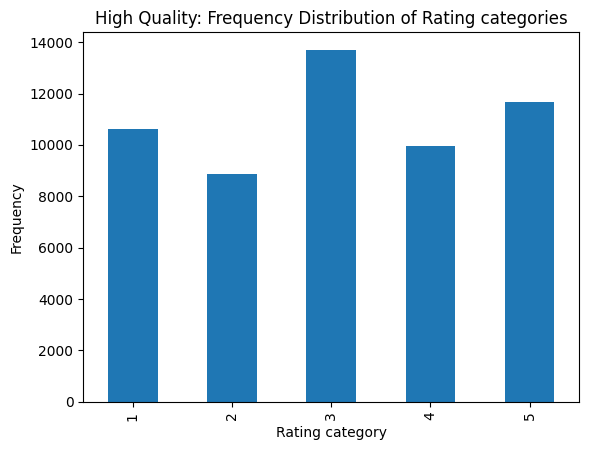

In [29]:
# Categorize rating for high quality
hq_df['Rating-Category'] = pd.cut(hq_df['Book-Rating'], 
                                    bins=[0, 6, 7, 8, 9,10], 
                                    labels=[1, 2, 3, 4, 5], 
                                    right=True)
rating_counts = hq_df['Rating-Category'].value_counts().sort_index()
rating_counts.plot(kind='bar')

# Set plot title and labels
plt.title('High Quality: Frequency Distribution of Rating categories')
plt.xlabel('Rating category')
plt.ylabel('Frequency')

# Display the plot
plt.show()

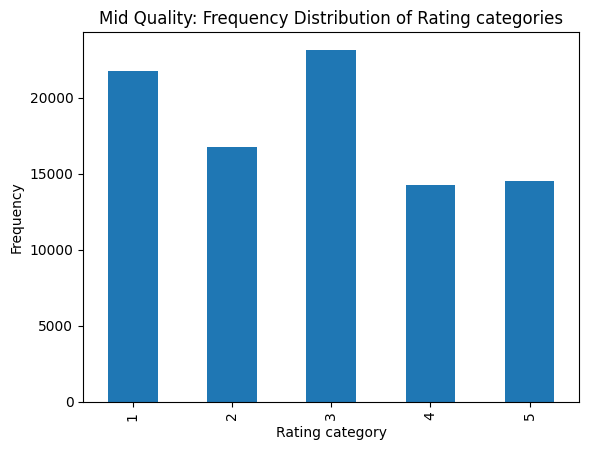

In [28]:
# Categorize rating for mid quality
mq_df['Rating-Category'] = pd.cut(mq_df['Book-Rating'], 
                                    bins=[0, 6, 7, 8, 9,10], 
                                    labels=[1, 2, 3, 4, 5], 
                                    right=True)
rating_counts = mq_df['Rating-Category'].value_counts().sort_index()
rating_counts.plot(kind='bar')

# Set plot title and labels
plt.title('Mid Quality: Frequency Distribution of Rating categories')
plt.xlabel('Rating category')
plt.ylabel('Frequency')

# Display the plot
plt.show()

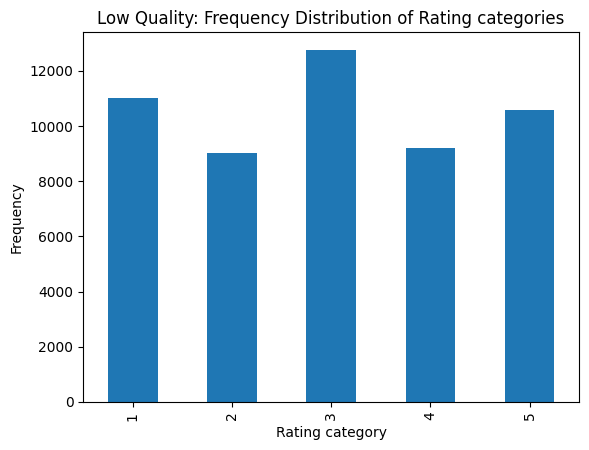

In [30]:
# Categorize rating for low quality
lq_df['Rating-Category'] = pd.cut(lq_df['Book-Rating'], 
                                    bins=[0, 6, 7, 8, 9,10], 
                                    labels=[1, 2, 3, 4, 5], 
                                    right=True)
rating_counts = lq_df['Rating-Category'].value_counts().sort_index()
rating_counts.plot(kind='bar')

# Set plot title and labels
plt.title('Low Quality: Frequency Distribution of Rating categories')
plt.xlabel('Rating category')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [31]:
# Regresson for high quality
x = hq_df.drop(columns=['ISBN', 'Book-Rating', 'Rating-Category', 'Book-Title', 'Book-Author', 'Book-Publisher', 'Year-Of-Publication-Bin', 'User-City', 'User-State', 'User-Country', 'User-Age-Bin'])
y = hq_df['Book-Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Compute MSE and R2 of linear regresson
linear_reg= LinearRegression()
linear_scores = cross_val_score(linear_reg, x, y, cv= 5, scoring= 'neg_mean_squared_error')
linear_r2_scores = cross_val_score(linear_reg, x ,y, cv=5, scoring = 'r2')
linear_rmse_scores= (-linear_scores)**0.5

print('Linear Regression Cross-Validation RMSE Scores:')
print(linear_rmse_scores)
print('Linear Regression Mean RMSE:', linear_rmse_scores.mean())
print()
print('Linear Regression Cross-Validation R^2 Scores:')
print(linear_r2_scores)
print('Linear Regression Mean R^2:', linear_r2_scores.mean())

Linear Regression Cross-Validation RMSE Scores:
[1.68232372 1.67055318 1.71789388 1.79432136 1.76565429]
Linear Regression Mean RMSE: 1.7261492857792462

Linear Regression Cross-Validation R^2 Scores:
[-0.01314276  0.02424611  0.02378007  0.01065914  0.01463931]
Linear Regression Mean R^2: 0.012036373799585155


In [32]:
# Initialize Decision Tree Regression model
dt_reg= DecisionTreeRegressor(random_state=42)

# Cross-validation for Decision Tree Regression
dt_scores = cross_val_score(dt_reg, x, y, cv=5,scoring='neg_mean_squared_error')
dt_r2_scores =cross_val_score(dt_reg, x, y, cv=5,scoring='r2')
dt_rmse_scores =(-dt_scores)**0.5
print('Decision Tree Regression Cross-Validation RMsE Scores:')
print(dt_rmse_scores)
print('Decision Tree Regression Mean RMSE:', dt_rmse_scores.mean())
print()
print('Decision Tree Regression Cross-Validation R^2 Scores:')
print(dt_r2_scores)
print('Decision Tree Regression Mean R^2:', dt_r2_scores.mean())

Decision Tree Regression Cross-Validation RMsE Scores:
[2.49001699 2.52432297 2.49192939 2.49194988 2.42645854]
Decision Tree Regression Mean RMSE: 2.48493555470181

Decision Tree Regression Cross-Validation R^2 Scores:
[-1.21950501 -1.22797094 -1.0541231  -0.90820091 -0.86092828]
Decision Tree Regression Mean R^2: -1.0541456480154234


In [33]:
# Regresson for mid quality
x = mq_df.drop(columns=['ISBN', 'Book-Rating', 'Rating-Category', 'Book-Title', 'Book-Author', 'Book-Publisher', 'Year-Of-Publication-Bin', 'User-City', 'User-State', 'User-Country', 'User-Age-Bin'])
y = mq_df['Book-Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Compute MSE and R2 of linear regresson
linear_reg= LinearRegression()
linear_scores = cross_val_score(linear_reg, x, y, cv= 5, scoring= 'neg_mean_squared_error')
linear_r2_scores = cross_val_score(linear_reg, x ,y, cv=5, scoring = 'r2')
linear_rmse_scores= (-linear_scores)**0.5

print('Linear Regression Cross-Validation RMSE Scores:')
print(linear_rmse_scores)
print('Linear Regression Mean RMSE:', linear_rmse_scores.mean())
print()
print('Linear Regression Cross-Validation R^2 Scores:')
print(linear_r2_scores)
print('Linear Regression Mean R^2:', linear_r2_scores.mean())

Linear Regression Cross-Validation RMSE Scores:
[1.8693095  1.81097392 1.77211764 1.79027026 1.79449102]
Linear Regression Mean RMSE: 1.8074324679240248

Linear Regression Cross-Validation R^2 Scores:
[ 0.00565001  0.00192597  0.00197067  0.0032704  -0.00125645]
Linear Regression Mean R^2: 0.0023121180756042305


In [34]:
# Initialize Decision Tree Regression model
dt_reg= DecisionTreeRegressor(random_state=42)

# Cross-validation for Decision Tree Regression
dt_scores = cross_val_score(dt_reg, x, y, cv=5,scoring='neg_mean_squared_error')
dt_r2_scores =cross_val_score(dt_reg, x, y, cv=5,scoring='r2')
dt_rmse_scores =(-dt_scores)**0.5
print('Decision Tree Regression Cross-Validation RMsE Scores:')
print(dt_rmse_scores)
print('Decision Tree Regression Mean RMSE:', dt_rmse_scores.mean())
print()
print('Decision Tree Regression Cross-Validation R^2 Scores:')
print(dt_r2_scores)
print('Decision Tree Regression Mean R^2:', dt_r2_scores.mean())

Decision Tree Regression Cross-Validation RMsE Scores:
[2.62193048 2.56214229 2.5474608  2.58316653 2.59124746]
Decision Tree Regression Mean RMSE: 2.581189509947052

Decision Tree Regression Cross-Validation R^2 Scores:
[-0.95622674 -0.9977671  -1.06240156 -1.07512837 -1.08775979]
Decision Tree Regression Mean R^2: -1.0358567098975895


In [35]:
# Regresson for low quality
x = lq_df.drop(columns=['ISBN', 'Book-Rating', 'Rating-Category', 'Book-Title', 'Book-Author', 'Book-Publisher', 'Year-Of-Publication-Bin', 'User-City', 'User-State', 'User-Country', 'User-Age-Bin'])
y = lq_df['Book-Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Compute MSE and R2 of linear regresson
linear_reg= LinearRegression()
linear_scores = cross_val_score(linear_reg, x, y, cv= 5, scoring= 'neg_mean_squared_error')
linear_r2_scores = cross_val_score(linear_reg, x ,y, cv=5, scoring = 'r2')
linear_rmse_scores= (-linear_scores)**0.5

print('Linear Regression Cross-Validation RMSE Scores:')
print(linear_rmse_scores)
print('Linear Regression Mean RMSE:', linear_rmse_scores.mean())
print()
print('Linear Regression Cross-Validation R^2 Scores:')
print(linear_r2_scores)
print('Linear Regression Mean R^2:', linear_r2_scores.mean())

Linear Regression Cross-Validation RMSE Scores:
[1.80129561 1.77254038 1.78604606 1.78925329 1.77722128]
Linear Regression Mean RMSE: 1.7852713228477683

Linear Regression Cross-Validation R^2 Scores:
[ 0.00422186  0.00165533 -0.00138842  0.00369076  0.00090623]
Linear Regression Mean R^2: 0.0018171508696474214


In [36]:
# Initialize Decision Tree Regression model
dt_reg= DecisionTreeRegressor(random_state=42)

# Cross-validation for Decision Tree Regression
dt_scores = cross_val_score(dt_reg, x, y, cv=5,scoring='neg_mean_squared_error')
dt_r2_scores =cross_val_score(dt_reg, x, y, cv=5,scoring='r2')
dt_rmse_scores =(-dt_scores)**0.5
print('Decision Tree Regression Cross-Validation RMsE Scores:')
print(dt_rmse_scores)
print('Decision Tree Regression Mean RMSE:', dt_rmse_scores.mean())
print()
print('Decision Tree Regression Cross-Validation R^2 Scores:')
print(dt_r2_scores)
print('Decision Tree Regression Mean R^2:', dt_r2_scores.mean())

Decision Tree Regression Cross-Validation RMsE Scores:
[2.59741163 2.57927251 2.57436066 2.62241827 2.55425635]
Decision Tree Regression Mean RMSE: 2.5855438829897706

Decision Tree Regression Cross-Validation R^2 Scores:
[-1.07049492 -1.11389148 -1.08044403 -1.14020036 -1.06372681]
Decision Tree Regression Mean R^2: -1.0937515201745476
